#Importing modules and libraries
import pylab as pl
import pandas as pd
import numpy as np
%pylab inline
 
import os

plt.style.use('ggplot')


In [5]:
#Reading the dataset as a panda dataframe
bikedata=pd.read_csv('201410-citibike-tripdata.csv')

In [6]:
#Calculating age from dataframe 
bikedata['age'] = 2014 - bikedata['birth year']

Idea:
Younger people are more likely to use the citibikes

Null Hypotesis:

The proportion of Citibike riders aged above 40 years, is higher or equal to the proportion of riders aged less or equal to 40 years for a month with controlled climate variables. 

We selected the month of October because it presents the smaller amount of average rainfall per month a year.

$P_o$: *Proportion of riders above 40 years old.*

$P_1$: *Proportion of riders below 40 years old.*

$$H_0: P_0 - P_1 \geq 0 $$
$$H_1: P_0 - P_1 < 0 $$



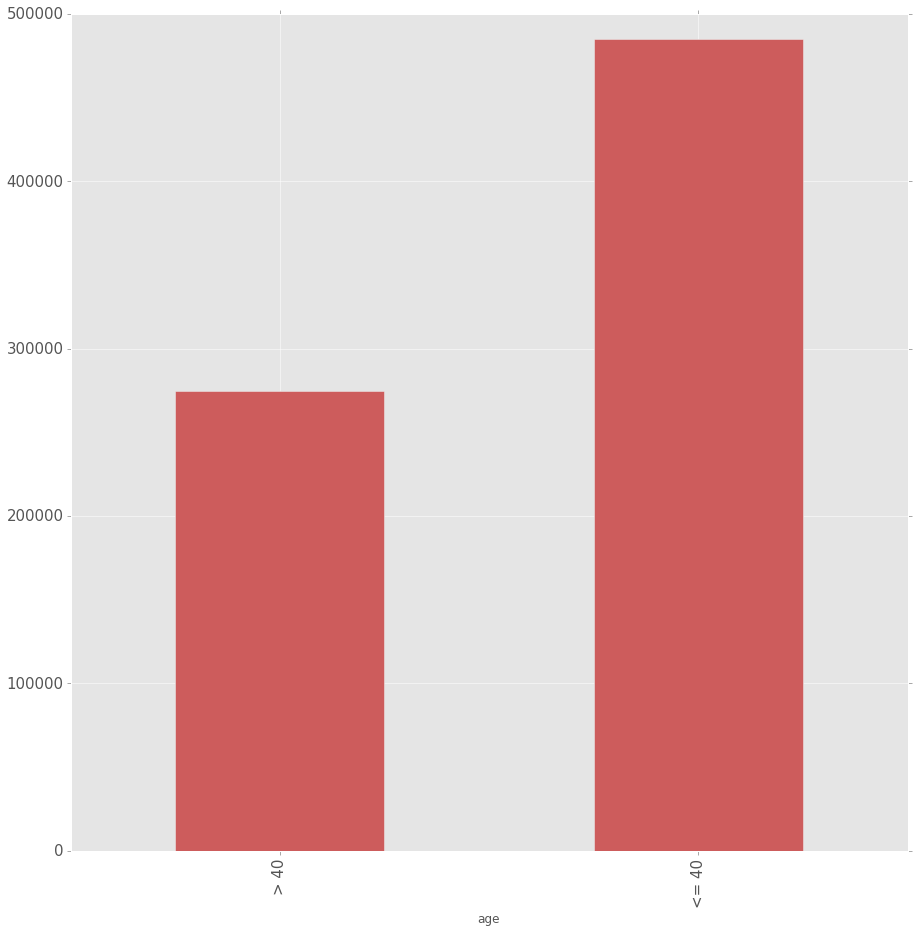

In [14]:
#Plotting age ranges
fig=pl.figure(figsize(15,15))
fig.set_
ax = ((bikedata['age'].groupby(bikedata['age']<= 40).count())).plot(kind="bar", color='IndianRed', fontsize=15);
ax.xaxis.set_ticklabels(['> 40','<= 40']);

In [79]:
#Defining variable for agreggated age range 
AgeProp = bikedata['age'].groupby(bikedata['age']<= 40).count()

In [80]:
#Defining multiple variables for agreggated age ranges
N = AgeProp.sum()
ticks = AgeProp/AgeProp.sum()
p0 = ticks[1]
p1 = ticks[0]
print ticks
#print(AgeProp[1])
#print(AgeProp[0])

age
False    0.361541
True     0.638459
Name: age, dtype: float64


In [81]:
#Calculating proportions for each defined data range
#Calculating standard deviation
#Calculating Z-score
P0mP1=p0-p1
print("The estimated diference of proportions is: ") +str(P0mP1)

sp_stdev= lambda p0, n1: np.sqrt(p0*(1-p0)/n1)
sp_stdev_age=sp_stdev(p0,N)

zscore = lambda p0, p1, s : (p0-p1)/s
z = zscore(p0,p1,sp_stdev_age)
print("The estimated z score is:") + str(z)

The estimated diference of proportions is: 0.276918580772
The estimated z score is:502.349792817


In [82]:
p_2y=1-0.9998
alpha = 0.05

def report_result(p,a):
    print 'Is the p value {0:.2f} smaller than the critical value {1:.2f}? '.format(p,a)
    if p<a:
        print "YES!"
    else: print "NO!"
    
    print 'The Null hypothesis is {}'.format( 'rejected' if p<a  else 'not rejected') 

report_result(p_2y,alpha)

Is the p value 0.00 smaller than the critical value 0.05? 
YES!
The Null hypothesis is rejected


Standard error in counting population older than 40: 0.001908
Standard error in counting population 40 or younger: 0.001436


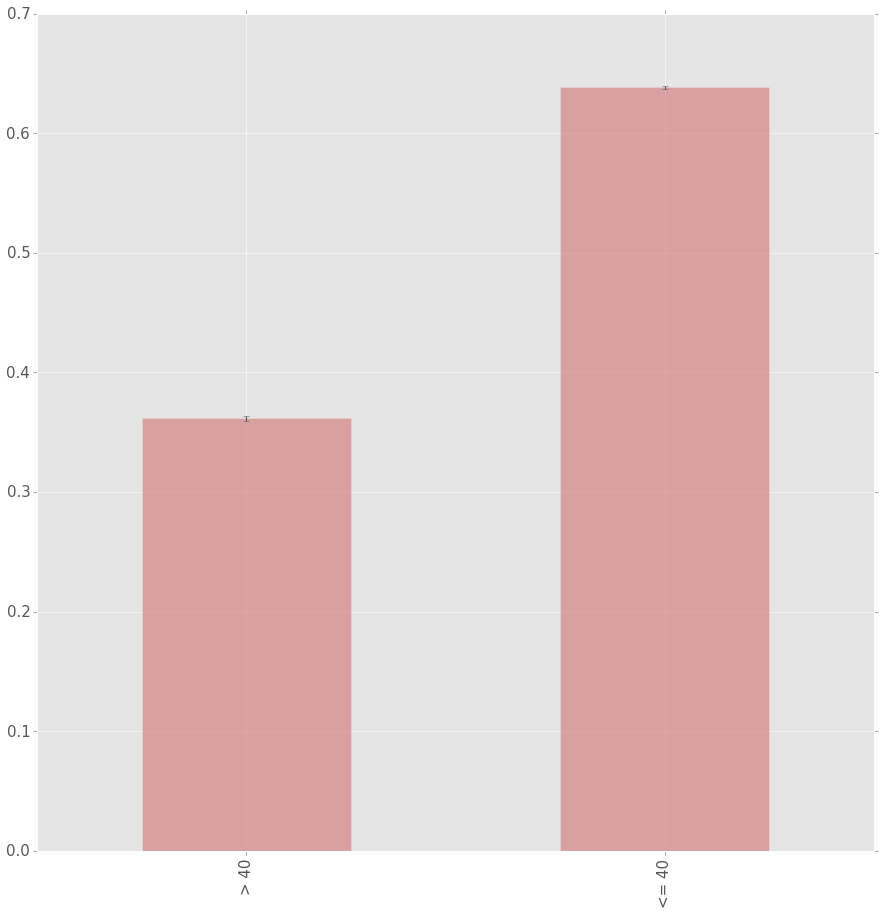

In [35]:
#Error calculation 
#Since the process is Poisson the error is given by the square root of the counts

error_young = np.sqrt((bikedata[bikedata['age'] <= 40]['age']).count())
error_old = np.sqrt((bikedata[bikedata['age'] > 40]['age']).count())

norm_young = (bikedata['age'] <= 40).sum()
norm_old = (bikedata['age'] > 40).sum()

total_riders = (norm_old + norm_young)

rider = bikedata['age'].groupby(bikedata['age'] <= 40).count()

ratio_old = (rider[0]/float(total_riders))
ratio_young = (rider[1]/float(total_riders))

print "Standard error in counting population older than 40: %f" % (error_old/norm_old)
print "Standard error in counting population 40 or younger: %f" % (error_young/norm_young)
fig=pl.figure(figsize(15,15))
 
ax = (pd.Series([ratio_old,ratio_young])).plot(kind = 'bar', color = 'IndianRed', yerr = [error_old/norm_old,error_young/norm_young], alpha = 0.5, fontsize=15)
ax.xaxis.set_ticklabels(['> 40','<= 40']);

Comparison of error and standard deviation :

0.361540709614 0.00190819194453
0.638459290386 0.0014359326011


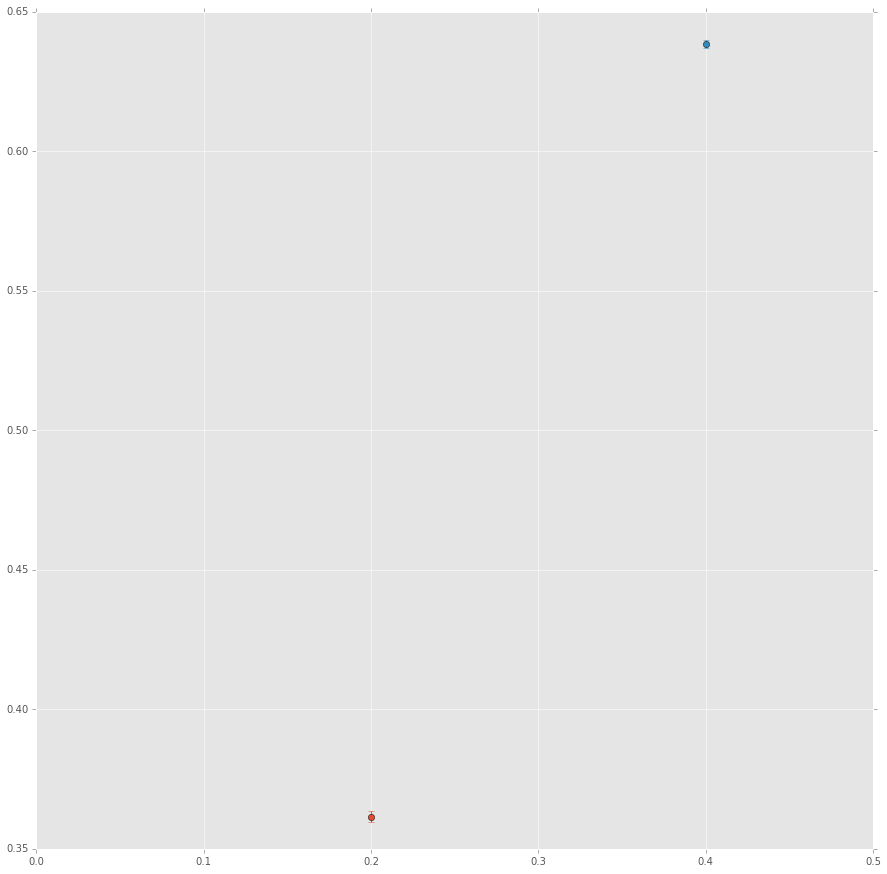

In [40]:
fig=pl.figure(figsize(15,15))
ax=fig.add_subplot(111)

ax.errorbar([0.2], ratio_old, yerr = error_old/norm_old, fmt = 'o', label = '>=40');
ax.errorbar([0.4], ratio_young, yerr = error_young/norm_young, fmt = 'o', label = '<40');
ax.set_xlim(0,0.5);

274635 828711
